# 3D Mark - The Optimal build

In the world of technology, PCs have been a widely used device for a number of reasons, one of which is used for gaming. PC Gaming has been rapidly increasing over the coming decades due to the versatility of the different builds of a computer. Prices of gaming computers can range from around  £500 all the way up to north of £15,000 and nowadays PCs are being custom built by individuals or are being built by comissioners.

Once the PC may be built they may be content with the completed build however, they may come to the realisation that they may not be able to play a particular game ( E.g. Dark Souls 3 ) due to the fact that the CPU/GPU may not be performing as well as they had hoped and therefore they must purchase a brand new component and waste the original component. Things such as GPU's and RAM cards may be re-used and re-sold, but things such as the CPU, Motherboards tend not to be something that people will sell as it is very difficult to remove the CPU from the Motherboard once inserted due to the fact that the pins that connect the two together are very fragile and as soon as one of the pins are damaged/bent , they cannot be used again.

Certain PC builds will be run certain games smoothly ( over 60 frames/sec ) and some may not and we are able to have a good idea of whether it does or not by running 3DMark.

3DMark is a benchmarking tool that is run on a particular PC and runs a simulation. This simulation primarily takes into account the GPU and the CPU and sees the different kind of intensities they are able to handle with ease. At the end of the simulation, it provides a 3DMark Score where the higher value indicates that it has a higher average performance throughout all different graphic settings.

In This capstone project, we will be attempting to predict the 3DMark Score a particular Computer build will have and thus we will be able to have an idea of whether they will be running smoothly or not. 

We could decide whether we can want to cluster these groups and see if certain builds have similarities and discinction, or we could determine if they will run over 60FPS on average, for all different genres of games.

## Features

There are many different features of a PC and we will be looking at the components that the  majority of modern custom built PCs will have. The following will not be considered:

* Case / Chassis
* Floppy Disk Drive
* CD-rom Drive
* Modem
* Sound Card
* SSD / HDD

The reason for not including some may be due to the fact that they are redundant / have no effect on the actual simulation.

Components that are considered :

* GPU ( Graphics Processing Unit )
* CPU ( Central Processing Unit )
* RAM ( Random Access Memory )
* Power Supply
* Motherboard
* Monitor

The GPU, CPU and RAM can also vary due to the model type aswell as whether the CPU is able to be overclocked or not. So we will also be looking into the following features aswell:

* GPU
    * Manufacturer
    * \# Of GPUs ( 1 - 4)
    * SLI = True/False
    * Clockspeed (MHz)
    * VRAM
    * VRAM Bandwidth
   
* CPU
    * Base Clockspeed (Mhz)
    * Turbo Clockspeed (Mhz)
    * MicroArchitechture
    * \# of Cores
    * \# of Threads

## Web Scraping

The data will be kindly provided by the company 3DMark,however, while waiting for them to provide the data, I will be scraping some of the data on their website in order to be ready to use my functions well in advance.

#### Note: There will be some user_id's where there will not be any results found. This is due to the fact that the user has taken down their results from the website.

#### If there is nothing on that user, we will replace with a NaN and then remove them later on.

In [ ]:
results = []
users=[]
for iterations in range(3):
    user_id = random.randint(10000,10000000)
    users.append(user_id)
    url= "https://www.3dmark.com/spy/{}".format(user_id)
    r= requests.get(url)
    soup=BeautifulSoup(r.text, 'html.parser')
    try:
        results.append(soup.find('div',attrs={'class':'result-details mr'}))
    except:
        results.append(np.nan)
        
        
        

# GPU

In [ ]:
# Not required
def GPU_names(results):
    gpu_name=[]
    for user in results:
        try:
            GPU_info = user.find_all('dl',attrs={'class':'data clearfix'})[0]
        except:
            gpu_name.append(np.nan)
        gpu_name.append(GPU_info.find('a',attrs={'class':'hw-link'}).text.strip())
    return gpu_name

In [ ]:
GPU_names(results)

In [ ]:
all_users=[]
for user in range(len(results)):
    info=[]
    for x in results[user].find_all('dl',attrs={'class':'data clearfix'}):
        for i in x.find_all('dd'):
            info.append(i.text.strip())
    all_users.append(info)

In [ ]:
all_users[0]

In [ ]:
info_names=[]
for x in results[0].find_all('dl',attrs={'class':'data clearfix'}):
    for i in x.find_all('dt'):
        info_names.append(i.text.strip())

In [ ]:
info_names

In [ ]:
new_all_users=[]
for user in all_users:
    users=[]
    for item in user:
        if item not in users:
            users.append(item)
    new_all_users.append(users)
    
all_users=new_all_users.copy()

In [ ]:
all_users

In [ ]:
pd.DataFrame(all_users[:2],columns=info_names)

In [ ]:
GPU_info_vars=[]
for x in GPU_info.find_all('dt'):
    GPU_info_vars.append(x.text)

In [ ]:
GPU_info_vars

In [ ]:
GPU_info_stats=[]
for x in GPU_info.find_all('dd'):
    GPU_info_stats.append(x.text.strip())

In [ ]:
CPU_info.find_all('dd'):

# CPU

In [ ]:
GPU_results={}
CPU_results={}
for x in range(len(results)):
    GPU_info=results[x].find_all('dl',attrs={'class':'data clearfix'})[0]
    CPU_info=results[x].find_all('dl',attrs={'class':'data clearfix'})[1]
    
    final_results[users[x]['GPU']]={x.text:y.text.strip() for x,y in zip(GPU_info.find_all('dt'),GPU_info.find_all('dd'))}
    CPU_results[users[x]]={x.text:y.text.strip() for x,y in zip(CPU_info.find_all('dt'),CPU_info.find_all('dd'))}

In [ ]:
new_results={x.text:y.text.strip() for x,y in zip(CPU_info.find_all('dt'),CPU_info.find_all('dd'))}

In [ ]:
#Not required
def CPU_names(results):
    cpu_name=[]
    for user in results:
        try:
            cpu_info = user.find_all('dl',attrs={'class':'data clearfix'})[1]
        except:
            cpu_name.append(np.nan)
        cpu_name.append(cpu_info.find('a',attrs={'class':'hw-link'}).text.strip())
    return cpu_name

In [ ]:
CPU_names(results)

In [ ]:
CPU_info=results[0].find_all('dl',attrs={'class':'data clearfix'})[1]

In [ ]:
CPU_info=[]
for user in results:
    CPU_info.append(user.find_all('dl',attrs={"class",'data clearifx'})[1])

In [ ]:
CPU_info_vars=[]
for x in CPU_info.find_all('dt'):
    CPU_info_vars.append(x.text)

In [ ]:
CPU_info_vars

In [ ]:
CPU_info_stats=[]
for x in CPU_info.find_all('dd'):
    CPU_info_stats.append(x.text.strip())

In [ ]:
CPU_info_stats

In [ ]:
boxes = results[1].find_all('dl',{'class':'data clearfix'})
dds = boxes[0].find_all('dd')

dds

## Trial Runs with just 1 user_id

In [ ]:
url= "https://www.3dmark.com/spy/10000001"
r=requests.get(url)
soup=BeautifulSoup(r.text,'html.parser')

In [ ]:
GPU_info =soup.find_all('dl',attrs={'class':'data clearfix'})[0]
CPU_info =soup.find_all('dl',attrs={'class':'data clearfix'})[1]
misc_info = soup.find_all('dl',attrs={'class':'data clearfix'})[2]

In [ ]:
GPU_info

In [ ]:
def extract_cpu_name(results):
    cpu_name=[]
    for user in results:
        CPU_info = user.find_all('dl',attrs={'class':'data clearfix'})[1]
        try:
            cpu_name.append(CPU_info.find('a',attrs={'class':'hw-link'}).text)
        except:
            cpu_name.append
    return cpu_name

In [ ]:
soup.find_all('dl',attrs={'class':'data clearfix'})[1].find_all('dd')[1].text

In [ ]:
print(soup.find('dl',attrs={'class':'data clearfix'}).findNext(attrs={'class':'data clearfix'}).contents)

# THE ACTUAL DATA

In [35]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm_notebook
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [36]:
import dtale

In [37]:
df=pd.read_csv('./3dmark_dataset.csv')

In [38]:
dtale.show(df)

http://Kis-MacBook-Pro-2.local:40000/dtale/main/1
It looks like this data may have already been loaded to D-Tale based on shape and column names. Here is URL of the data that seems to match it:

None

If you still want to load this data please use the following command:

dtale.show(df, ignore_duplicate=True)


Things to look at : ( suggested by product manager of UL)

Verify that with the same CPU, the CPU score scales approximately linearly with the CPU frequency (pick CPUs that support overclocking such as Intel K or X -series to get more data points with different frequencies)  
Investigate how memory frequency, memory channels and timings affect the CPU performance - expect it to be different between AMD and Intel and also between different generations and architectures  
Investigate how Graphics score scales with changing core & memory clock frequencies with the same GPU
Investigate performance differences between different graphics cards and brands and BIOS versions with the same GPU  
Check how much score improves with a multi-GPU configuration, is this different between GPUs?  
Compare performance of ready-built PCs and DIY PCs with similar components.  


## Cleaning & EDA

#### Since there are quite a lot of observations where the Overall 3DMark Score are 0, we are going to remove these, since it affects the distribution of it and therefore we will only be looking at the tests in which they were actually successful

### EDA on numerical data

In [39]:
from sklearn.preprocessing import StandardScaler

Seemed very interesting to me that the Clock speed se

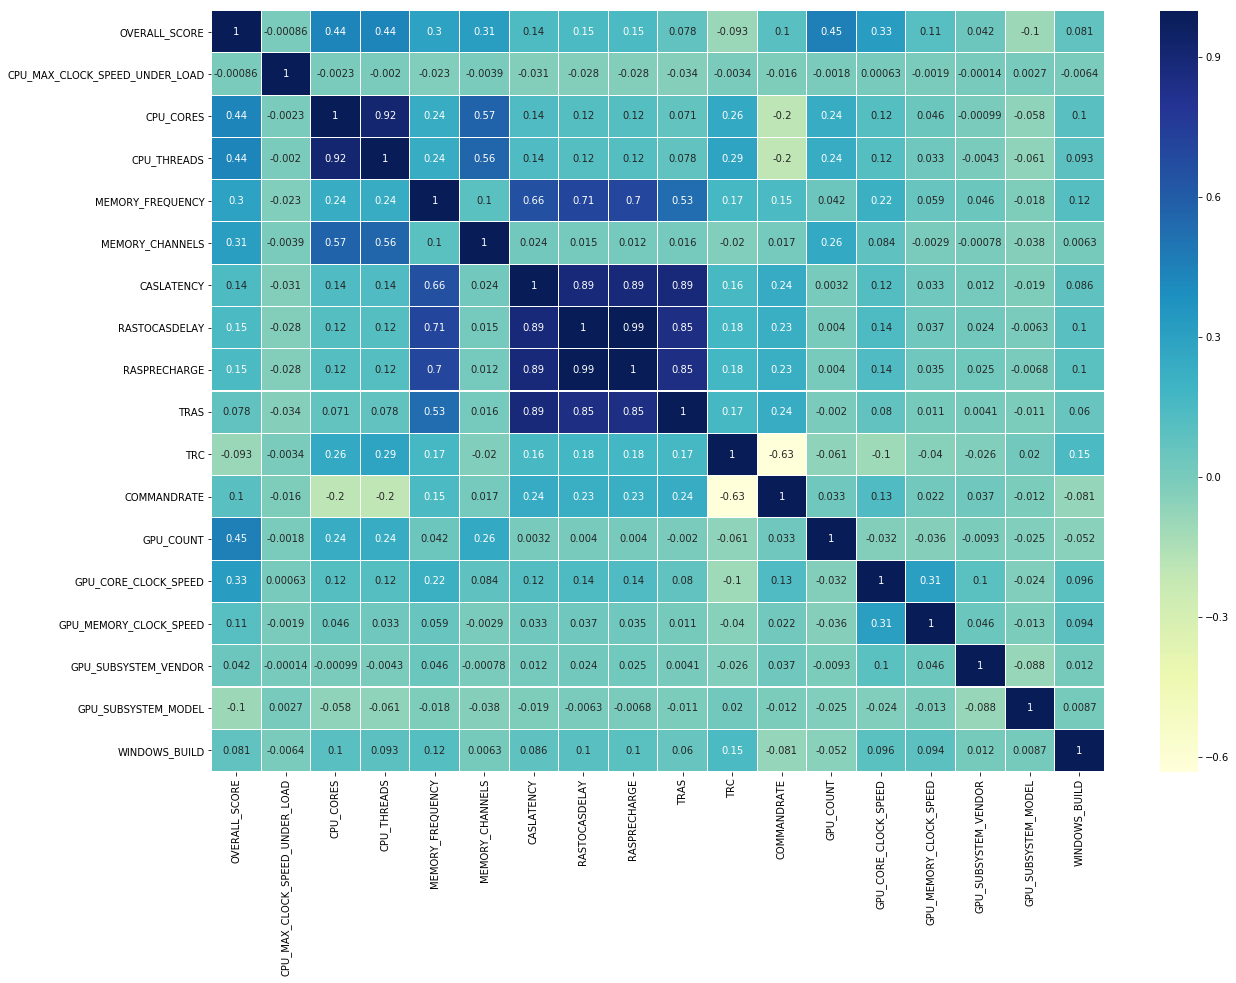

In [44]:
plt.figure(figsize=(20,14))
sns.heatmap(df.drop(['GRAPHICS_SCORE','CPU_SCORE','WINDOWS_MAJOR_VERSION','WINDOWS_MINOR_VERSION'],axis=1).corr(),annot=True,linewidth=0.1,cmap='YlGnBu',)
plt.show()

In [25]:
#Dropping RASPRECHARGE, since it is practically the same as RASTOCASDELAY
df.drop('RASPRECHARGE',axis=1,inplace=True)

In [ ]:
numerical_types = 'int64'
fixed_num = df.select_dtypes(include=numerical_types)

scaler=StandardScaler()
fixed_num  = pd.DataFrame(scaler.fit_transform(fixed_num),columns=fixed_num.columns)

In [ ]:
#Seems that CPU_MAX_CLOCK_SPEED_UNDER_LOAD has a big outlier
fig= plt.figure(figsize=(20,20))
ax=fig.gca()
sns.boxplot(data=fixed_num, orient='h', ax=ax, fliersize=5)
plt.show()

In [ ]:
sns.distplot(df['OVERALL_SCORE'],fit=norm,kde=False)

In [ ]:
sns.distplot(df[df['OVERALL_SCORE']!=0]['OVERALL_SCORE'],fit=norm,kde=False);

In [ ]:
data = df[df['OVERALL_SCORE']!=0].copy()

In [ ]:
# There are some CPU clock speeds in which there are weird errors such as a value like 2,147,483,647
# This number is the maximum value for a 32bit signed binary integer in computing.
# In order to filter these, we will limit it to 50,000Mhz as the 2014 world-record for high clock speed is
# 8,723MHz per Core
data=data[data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD']<10000]

#We are also going to round the clock speeds to nearest 100Mhz since these are the ideal clock speeds that they
# are wanting

#data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD']=data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD'].apply(lambda x: round(x,-2))

plt.figure(figsize=(10,8))
sns.distplot(data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD'],fit=norm,kde=False,bins=100);

In [ ]:
data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD'].value_counts()

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD'].apply(lambda x: round(x,-2)),fit=norm,kde=False,bins=75);

In [ ]:
data.columns

In [ ]:
data[(data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD']==5002) | (data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD']==5004)][['CPU_CORES','CPU_THREADS','CPU_SCORE','CPU_NAME']]['CPU_NAME'].unique()


In [ ]:
data['CPU_MAX_CLOCK_SPEED_UNDER_LOAD'].value_counts()[:10]

In [ ]:
# Since most product names have just a default 'System Product Name', we will convert all the NaN values also to
# 'System Product name', as it was probably custom-built by individuals and the individuals will not have bothered
# to put the name in.
data['SYSTEM_PRODUCT_NAME'].fillna('System Product Name',inplace=True)
data['system_version'].fillna('System Version',inplace=True)

# For all other columns, we will be dropping all the null values as these will all be strings and we cannot 
# Determine any of the values for the null values
data.dropna(inplace=True)

#Dropping TIME_SPY_PRESET, since only value is the string 'X' which wont have any effect on the actual 
data.drop('TIME_SPY_PRESET',axis=1,inplace=True)



In [ ]:
def replace_words_manufacturer(x):
    """
    There are alot of mis-spelled company names that are the same, so we will be cleaning up these company names
    
    """
    x=x.lower()
    
    x=x.replace('co., ltd','')
    x=x.replace('.','')
    x=x.replace('$','')
    x=x.replace(',','')
    
    x=x.replace('ltd','')
    x=x.replace('incorporated','')
    x=x.replace('inc','')
    x=x.replace('ltt','')
    x=x.replace('ldd','')
    x=x.replace('x79-16d','')
    x=x.replace('limited','')
    
    x=x.replace('corporation','co')
    x=x.replace('corproation','co')
    x=x.replace('corportion','co')
    x=x.replace('technology and development','')
    x=x.replace('corp','')
    x=x.replace('innovation and technology','')
    x=x.replace('technology','')
    x=x.replace('international co','')
    x=x.replace('international','')

    x=x.replace('asustek computer','asus')
    x=x.replace('asrockrack','asrock')
    x=x.replace('(shenzen)','')
    
    """
    
    since the string 'co' is in a commpany name called 'colorful' , we cannot change all 'co's to '' as it will
    come up with 'lorful'. Same applies for the string 'computer
    
    """
    
    x=x.replace('colorful  co','colorful')
    x=x.replace('yu gong  co','')
    
    x=x.replace('intel co','intel')
    x=x.replace('intel oem','intel')
    x=x.replace('amd co','amd')
    x=x.replace('onda  co','onda')
    
    x=x.replace('shinelon computer','shinelon')
    
    """
    
    There is a manufacturer called 'huananzhizhi' which causes all sorts of problems due to the fact that the name
    has repitition within it.
    For example : there is a name called 'huanan' and I need to replace it with 'huananzhizhi'
    But if i do this, then the company name called 'huananzhizhi' will be called 'huananzhizhizhizhi'
    
    """
    
    x=x.replace('huananzhi','huanan')
    x=x.replace('huanan','huananzhi')
    
    x=x.replace('to be filled by oem','unknown')
    x=x.replace('oem','unknown')
    return x

data['MOTHERBOARD_MANUFACTURER']=data['MOTHERBOARD_MANUFACTURER'].apply(lambda x:replace_words_manufacturer(x).strip())

In [ ]:
def replace_words_system_version(x):
    x=x.lower()
    x=x.replace('tbd.','tbd')
    x=x.replace('tbd by tbd','tbd')
    x=x.replace('to be filled by o.e.m.','tbd')
    x=x.replace('not applicable','tbd')
    x=x.replace('not specified','tbd')
    x=x.replace('invalid','tbd')
    x=x.replace('oem','tbd')
    
    return x

data['system_version']=data['system_version'].apply(lambda x: replace_words_system_version(x))

In [ ]:
#Removes Processor from the cpu name to prevent it from coming up from CountVectorizer
#The actual CPU names is full clean.
data['CPU_NAME']=data['CPU_NAME'].apply(lambda x: x.lower().replace('processor',''))

In [ ]:
# There seems to be some PCs where they have -1 memory channels which is physically impossible, and we will drop
# these
data=data[(data['MEMORY_CHANNELS']!=-1) & (data['MEMORY_CHANNELS']!=0)]

In [ ]:
#Lets get rid of GPU_CORE_CLOCK_SPEED that are 0, This tells us that the BIOS  (Basic Input Output System) is not reading the GPU's speeds
# And we are unable to actually determine the actual clock speed.

#Upon further research, the reason why most GPU's numbers are reading 0, is because it is using the Integrated Graphics Card
#From the CPU rather than the actual GPU itself and so these GPU_SCORES are not from the GPU.
data=data[data['GPU_CORE_CLOCK_SPEED']!=0]

In [ ]:
#This seems reasonable as it is possible to have 16,000Mhz of VRAM for a GPU
data['GPU_CORE_CLOCK_SPEED'].max()

In [ ]:
#Getting rid of Memory frequencies of 0 , Suggesting RAM is not being read.
data=data[data['MEMORY_FREQUENCY']!=0]
data.reset_index(inplace=True,drop=True)

In [ ]:
#Lets re-check the data and see if there are still any outliers
numerical_types = 'int64'
fixed_num = data.select_dtypes(include=numerical_types)

scaler=StandardScaler()
fixed_num  = pd.DataFrame(scaler.fit_transform(fixed_num),columns=fixed_num.columns)

In [ ]:
#Main thing to note,  WINDOWS_MAJOR_VERSION & WINDOWS_MINOR_VERSION are int values however since they are a version
#They should be considered a string
fig= plt.figure(figsize=(20,20))
ax=fig.gca()
sns.boxplot(data=fixed_num, orient='h', ax=ax, fliersize=5)
plt.show()

In [ ]:
fixed_num  = pd.DataFrame(scaler.fit_transform(fixed_num.drop(['WINDOWS_MAJOR_VERSION','WINDOWS_MINOR_VERSION','WINDOWS_BUILD'],axis=1)),columns=fixed_num.drop(['WINDOWS_MAJOR_VERSION','WINDOWS_MINOR_VERSION','WINDOWS_BUILD'],axis=1).columns)
fig= plt.figure(figsize=(20,20))
sns.boxplot(data=fixed_num, orient='h', fliersize=5)
plt.show()

In [ ]:
#Refer to this https://www.techpowerup.com/articles/64
#CASLATENCY : The time interval between each bit of information is sent (units in clock cycles)
#Not possible to have -1 cycles
print(data['CASLATENCY'].unique())
data=data[data['CASLATENCY']!=-1 ]

In [ ]:
#The windows builds doesnt affect the score as mentioned in the technical guide

data.drop(['WINDOWS_MAJOR_VERSION','WINDOWS_MINOR_VERSION','WINDOWS_BUILD'],axis=1,inplace=True)
data=data.reset_index(drop=True)

In [ ]:
data

In [ ]:
# Looking at the top 3 most used CPUs, alot of the time it does seem to be linearly correlated
# Reasoning why the same CPU can have different clock speeds and different scores is because it is overclockable
# Where the individual is able to choose how hard the CPU will work.
sns.lmplot(x='CPU_MAX_CLOCK_SPEED_UNDER_LOAD',y='CPU_SCORE',data=data[data['CPU_NAME']=='intel core i9-9900k '],ci=None)
sns.lmplot(x='CPU_MAX_CLOCK_SPEED_UNDER_LOAD',y='CPU_SCORE',data=data[data['CPU_NAME']=='intel core i7-8700k '],ci=None)
sns.lmplot(x='CPU_MAX_CLOCK_SPEED_UNDER_LOAD',y='CPU_SCORE',data=data[data['CPU_NAME']=='amd ryzen 7 2700x'],ci=None)
plt.show()

In [ ]:
data[(data['CPU_NAME']=='intel core i9-9900k ') & (data['CPU_SCORE']==14347)].columns

In [ ]:
#We are dropping these because we can directly calculate the OVERALL_SCORE by using the formula provided by
# 3DMARK Tehcnical guide : https://s3.amazonaws.com/download-aws.futuremark.com/3dmark-technical-guide.pdf
data.drop(['GRAPHICS_SCORE','CPU_SCORE'],axis=1,inplace=True)

#Timestamp only tells us when the simulation took place, but does not affect the OVERALL_SCORE
data.drop('TIMESTAMP',inplace=True,axis=1)

In [ ]:
df[df['CPU_MAX_CLOCK_SPEED_UNDER_LOAD']<10000][['CPU_MAX_CLOCK_SPEED_UNDER_LOAD','OVERALL_SCORE']].corr('spearman')

In [ ]:
sns.distplot(df[df['CPU_MAX_CLOCK_SPEED_UNDER_LOAD']<10000]['CPU_MAX_CLOCK_SPEED_UNDER_LOAD'],fit=norm)

## Determining whether GPU is NVIDIA or AMD

We will be using this for later during hypothesis testing

In [ ]:
GPU = pd.DataFrame(data['GPU_NAME']).copy()

In [ ]:
def graphics_card(x):
    if 'nvidia' in x.lower():
        return 'nvidia'
    elif 'amd' in x.lower():
        return 'amd'

In [ ]:
GPU['NVIDIA/AMD']= GPU['GPU_NAME'].apply(lambda x: graphics_card(x))

In [ ]:
GPU['NVIDIA/AMD'].value_counts(normalize=True)

### COUNT VECTORIZING 

#### We will be doing some NLP and therefore will be using the CountVectorizer function to have a look at the number of times a particular word will come up.

#### These are the columns we will be count vectorizing:
GPU_NAME  
GPU_DRIVER_VERSION  
GPU_BIOS_VERSION  
CPU_NAME  
SYSTEM_PRODUCT_NAME  
system_version  
MOTHER_BOARD_MANUFACTURER  
MOTHERBOARD_MODEL   

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp

In [ ]:
x = data[['GPU_NAME','GPU_DRIVER_VERSION','GPU_BIOS_VERSION',
      'CPU_NAME','SYSTEM_PRODUCT_NAME','system_version',
      'MOTHERBOARD_MANUFACTURER','MOTHERBOARD_MODEL']]

In [ ]:
all_words=x.apply(lambda y: ' '.join(y), axis = 1)

In [ ]:
cvec= CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=100,token_pattern=r"(?u)[\w.-]+|\w+")
cvec.fit(all_words)

In [ ]:
words=cvec.get_feature_names()
cvec_mat = cvec.transform(all_words)

In [ ]:
word_count=pd.DataFrame(cvec_mat.sum(axis=0),columns=words).T.sort_values(by=0,ascending=False)
word_count.rename(columns={0:'Count'},inplace=True)

In [ ]:
word_count.head(10)

In [ ]:
vectorised= pd.DataFrame(cvec.transform(all_words).toarray(),columns=words)
vectorised

In [ ]:
#Having a look at the different words. There seem to be individual nuumbers like 7 or 5, this comes from the value
#ryzen 5 and ryzen 7 (A particular type of cpu). Since ryzen 7 and ryzen 5 is already in vectorised columns
#We will eliminate the '5' and '7' columns and others alike that have no relevence.
vectorised.columns

In [ ]:
#Removed 13 columns
vectorised.drop(['wi-fi','7','5','9','filled','filled o.e.m.','tbd asrock','i9-9900k product','i7-8700k product','core','o.e.m. tbd','product','version','gaming','product version'],axis=1,inplace=True)

In [ ]:
vectorised.columns

In [ ]:
#Removing all the strings and replacing them as dummifications
final_data=pd.concat([data[[col for col in data.columns if col not in x.columns]],vectorised],axis=1)

In [ ]:
#These are the top 10 attributes towards the OVERALL_SCORE , regardless of if it is negative.
#From personal knowledge the larget factors seem to be of the GTX 2080 ti that impacts the score greatly.
final_data.corr()['OVERALL_SCORE'].sort_values(ascending=False)[:10][1:]

In [ ]:
final_data.to_csv('./huskicapstone.csv',index_label=False)

# Standardising Data

In [4]:
from sklearn.linear_model import LinearRegression, ElasticNetCV, ElasticNet, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold , GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
mark=pd.read_csv('./huskicapstone.csv')
X = mark.copy()
y = X.pop('OVERALL_SCORE')

In [ ]:
dtale.show(mark)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,shuffle=True)

In [ ]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

# Power Transformation

### Checking the distribution of features

ValueError: color kwarg must have one color per dataset

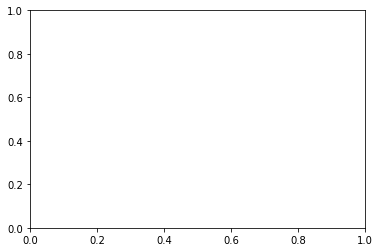

In [10]:
sns.distplot(X,fit=norm,bins=50,kde=False,color=['r'])

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
X_train.hist(figsize=(24,20),bins=50)
plt.show()

In [ ]:
power=PowerTransformer()
X_trainp=power.fit_transform(X_train)
X_testp=power.transform(X_test)

In [ ]:
pd.DataFrame(X_trainp, columns=X_train.columns).hist(figsize=(24,20),bins=50)
plt.show()

# Applying Different Models

In [11]:
import pickle

In [12]:
#Saving the Models
def save_pickle(element,file):
    with open(file, 'wb') as handle:
        pickle.dump(element, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Loading the models
def load_pickle(file):
    with open(file, 'rb') as handle:
        return pickle.load(handle)

## Simple Linear Regression

In [ ]:
model = LinearRegression()

#Simple Linear Regression
model.fit(X_train,y_train)
print('Training Score:',model.score(X_train,y_train))
print('Test Score:', model.score(X_test,y_test))

#Cross Validating the model
scores = cross_val_score(model,X_train,y_train,cv=5)
print('Mean Cross Validation Training Score:', scores.mean())

In [ ]:
#save_pickle(model,'Linear.pkl')

In [13]:
load_pickle('Linear.pkl')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## ElasticNetCV

In [ ]:
ratios = np.linspace(0.01,1,25)
model = ElasticNetCV(l1_ratio=ratios,n_alphas=100,cv=5,fit_intercept=True)

model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [ ]:
#save_pickle(model,'ElasticNetCV.pkl')

In [ ]:
model=load_pickle('ElasticNetCV.pkl')

In [ ]:
y.mean()

In [ ]:
mean_squared_error(y_train,model.predict(X_train))**0.5/ y.mean()

In [ ]:
print('Best Alpha:', model.alpha_)
print('Best l1_ratio:',model.l1_ratio_)   #Suggests that we will be using Lasso , not Ridge
print('Training Score:',model.score(X_train,y_train))
print('Test Score:',model.score(X_test,y_test))
print(cross_val_score(model,X_train,y_train,cv=5).mean())


#These RMSE Scores do not really tell anyone anything unless they know what is included in the data
#We know that the mean OVERALL_SCORE is 4944.7, and so that is a 12.3% variability.
print('Training data RMSE:', mean_squared_error(y_train,model.predict(X_train))**0.5)
print('Test data RMSE:', mean_squared_error(y_test,predictions)**0.5)

### Attritbutes for ElasticNetCV

.l1_ratio_ : tells you the proportionality between Ridge and Lasso  
.coef_     : will tell me the correlation between each feature and the target

### Adding Polynomial Features

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
kf= KFold(n_splits =5 ,shuffle = True,random_state =1)
model = DecisionTreeRegressor(max_depth=5,random_state=1)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
save_pickle(model,'DecisionTree.pkl')
load_pickle('DecisionTree.pkl')

In [ ]:
print('Decision Tree Scoes:\n')
print('Training Score:',model.score(X_train,y_train))
print('Test Score:',model.score(X_test,y_test))
print('Cross Validation Score:',cross_val_score(model,X_train,y_train,cv=kf,scoring='r2').mean())

### GridSearching Decision Tree

In [ ]:
model = DecisionTreeRegressor(random_state=1)

params = {'max_depth':[1,2,3,4,5],
          'max_features':[1,5,10,25],
          'min_samples_leaf':[1,2,3,4]}

gs=GridSearchCV(model,param_grid=params,cv=kf)
gs.fit(X_train,y_train)

In [ ]:
#save_pickle(gs,'GridSearchDT.pkl')
gs=load_pickle('GridSearchDT.pkl')

### Attributes for Gridsearch:

gs.best_estimator_ : if you want to find the best parameters for gridsearch to find the best score for decision tree regression

gs.best_score : as expected tells you the best score out of all the possible iterations

In [ ]:
print('Gridsearch Decision Tree Training Score:', gs.score(X_train,y_train))
print('Gridsearch Decision Tree Test Score:', gs.score(X_test,y_test))

## RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=1)

params = {'max_depth':[2,3,4],
          'max_features':[1,2,5,10],
          'n_estimators': list(np.logspace(0,2,30).astype(int))}

gs=GridSearchCV(model,param_grid=params,cv=kf)
                        
gs.fit(X_train,y_train)

In [ ]:
#save_pickle(gs,'RandomForestGrid.pkl')
model=load_pickle('RandomForestGrid.pkl')

In [ ]:
model.best_params_

In [ ]:
print('Best Training Score:',model.best_score_)
print('Test Score:',model.score(X_test,y_test))

In [ ]:
model.score(X_test,y_test)

In [ ]:
model = RandomForestRegressor(random_state=1,
                              max_depth=4,
                              max_features=10,
                              n_estimators=100)
model.fit(X_train,y_train)

In [ ]:
from sklearn.tree import export_graphviz
from os import system

In [ ]:
y_train

In [ ]:
model.estimators_

In [ ]:
def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model.best_estimator_, out_file=dotfile, feature_names=X.columns, filled=True,rounded=True, special_characters=True)
    dotfile.close()
    # comment out this line if you don't have GraphViz yet
    system("dot -Tpng tree.dot -o {0}".format(filename))

In [ ]:
build_tree_image(model,'tree.png')

In [ ]:
pd.DataFrame(model.best_estimator_.feature_importances_,index=X.columns).sort_values(by=0,ascending=False)[:10]

In [ ]:
pd.DataFrame(model.best_estimator_.feature_importances_,index=X.columns).sort_values(by=0,ascending=True)[:10]

In [ ]:
print('Training Score:',gs.score(X_train,y_train))
print('Test score:',gs.score(X_test,y_test))

# Extra bits

In [ ]:
pf=PolynomialFeatures(degree=2,include_bias=False)
X_train_std_pf = pf.fit_transform(X_train_std)
X_test_std = pf.transform(X_test_std)

In [ ]:
l1_ratios=np.linspace(0.01,1,25)
optimal_enet=ElasticNetCV(l1_ratio=l1_ratios,n_alphas=100,cv=5,verbose=0,tol=0.001)
optimal_enet.fit(X_train_std_pf,y_train)
#lr.fit(X_train_std_pf,y_train)

In [ ]:
cross_val_score(lr,X_train_std_pf,y_train,cv=5).mean()

## AWS

In [ ]:
rdd = sc.textFile('s3://capstonehuski/huskicapstone.csv')

### Finding the Unique Brands

In [ ]:
# Note : If the GPU_NAME, GPU_SUBSYSTEM_VENDOR,GPU_SUBSYSTEM_MODEL & GPU_BIOS_VERSION - This tells us that they are from the same brand


In [ ]:
range(len(data))

In [ ]:
len(data)-data[['GPU_NAME','GPU_SUBSYSTEM_VENDOR','GPU_SUBSYSTEM_MODEL','GPU_BIOS_VERSION']].duplicated().sum()

### DESCRIPTION

In [ ]:
DESCR = {'TIMESTAMP'                     :'The time at which the simulation was taken',
         'TIME_SPY_PRESET'               :'Letter denoting which Time Spy test it is, X:TimeSpyExtreme',
         'OVERALL_SCORE'                 :'3D Mark Score',
         'GRAPHICS_SCORE'                :'Score for Graphics Card calculated using the Graphics Test 1 and Graphics Test 2',
         'CPU_SCORE'                     :'Score for the CPU. 0 Denotes that the CPU test had failed / crashed ',
         'CPU_Name'                      :'CPU name, a K or an X represents whether this CPU is Overclockable or not',
         'CPU_MAX_CLOCK_SPEED_UNDER_LOAD':'The maximum clock speed, this may or may not be overclocked, we cannot know unless we know the base clock speed',
         'CPU_CORES'                     :'The number of cores',
         'CPU_Threads'                   :'Some CPU may be multithreading, and some may be hyperthreading',
         'MEMORY_Frequency'              :'The amount of bits being sent per second on one data line (MHz)',
         'MEMORY_CHANNELS'               :'The number of memory sticks that were used, generally this will be 1,2 or 4',
         'CASLATENCY'                    :'',
         'RASTOCASDELAY'                 :'',
         'RASPRECHARGE'                  :'',
         'TRAS'                          :'',
         'COMMANDRATE'                   :'',
         'GPU_NAME'                      :'This name will tell us the manufacturer and the Model, however not the branding',
         'GPU_COUNT'                     :'The number of GPUs used, most PC\'s will have 1 or 2 but HEDT (High End Desktop) can have 3 or 4. if 2+ This is called a SLI/Crossfire Configuration depending on the GPU manufacturer'
         'GPU_DRIVER_VERSION'            :'The Driver Version',
         'GPU_SUBSYSTEM_VENDOR'          :'The Branding of the GPU, Different brands will keep the same infrastructure of the actual ',
         'GPU_SUBSYSTEM_MODEL'           :'',
         'GPU_BIOS_VERSION'              :'',
         'SYSTEM_PRODUCT_NAME'           :'Signifies if the PC was custom built by an individual or was prebuilt by a particular company, E.g. \'All Stars\' suggests that it was made by ASUS' 
         'system_version'                :'',
         'MOTHERBOARD_MANUFACTURER'      :'',
         'MOTHERBOARD_MODEL'             :'',
         'WINDOWS_MAJOR_VERSION'         :'',
         'WINDOWS_MINOR_VERSION'         :' '}
            
         